In [ ]:
'''해야할 일
   1)다변량통계분석 수강 후 회귀모형, 회귀계수추정법, 변수 transform, 잔차 판정 등 작성하기
   2)다중공선성에 의한 전진선택법, 후진제거법, 단계선택법 코드 조사하기
   3)비선형회귀분석과 능형회귀분석 등 조사하기
'''

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('data/Ashopping.csv', encoding='cp949')

## 회귀분석(Regression)
독립변수들의 값이 주어졌을 때 종속변수 값을 예측하거나 독립변수와 종속변수간의 인과관계를 검증할 수 있는 기법이다.
- 독립변수와 종속변수간 `선형성`과 잔차는 서로 `독립`이며(독립성) 평균이 `0`이고 분산이 $\sigma^2$ `(등분산성)`인 `정규분포`를 따르길 가정한다.<br>
  회귀분석의 가정이 되는 잔차($Y_i - \hat{Y}_i$)란 추정된 회귀식으로부터 구해지는 확률변수로 모형 적합 후 각 가정을 따져보며 Tunning하는 과정을 거친다.
- 주어진 독립변수와 종속변수의 값으로 두 변수간 관계를 가장 잘 나타내는 회귀계수를 추정해 모형을 도출한다. 대표적인 회귀계수 추정법으로 최소제곱법(LSD)가 있으며 이는 오차($\epsilon$)를 최소화하는 값을 회귀계수로 한다. 
- 회귀모형의 설명력, 성능지표로 결정계수($R^2$)가 있다. 0과 1사이의 값을 가지며 회귀모형에 의해 설명된 변동비율로 클수록 회귀모형의 설명력이 높다.
  $$R^2 = \frac{\sum_{i=1}^n (\hat{Y}_i - \overline{Y})^2}{\sum_{i=1}^n (Y_i - \overline{Y})^2}$$
- 회귀모형의 설명력이 높아도 통계적으로 유의하지 않으면 일반화된 모형이 아니기에 사용할 수 없다. 회귀모형의 가정을 잘 만족하는 지 잔차그림, 독립변수와 표준화 잔차간 산점도, 종속변수 추정치와 표준화 잔차간 산점도 등으로 회귀진단 후 회귀모형 수정, 재적합을 거쳐야 한다.


### $\blacktriangleright$ 단순선형회귀분석(Simple Linear Regression)
1개의 수치형 독립변수가 1개의 수치형 종속변수에 미치는 영향을 분석한다.
$$Y_i = \beta_0 + \beta_1X_i + \epsilon_i,~ i=1,2,\cdots,n$$
$$(n: \text{자료수})$$
- 최소제곱법에 의해 추정한 회귀계수는 아래와 같다.(정여진교수님)
- 단순선형회귀분석에선 결정계수가 독립변수와 종속변수 간 상관계수의 제곱값과 같다.

In [30]:
# 1) 단순선형회귀분석
from statsmodels.formula.api import ols
model = ols('총_매출액 ~ 방문빈도', data=data).fit()

In [31]:
# 2) 모형의 유의성 검정
#  :회귀모형의 유의성은 F 통계량으로 검정하고 F-value는 660.8, p-value(Prob(F-statistic))은 3.05e-112로 대립가설을 채택한다.
#   유의하다 밝혀진 모형의 설명력(R-squared)는 0.398로 설명력은 부족하다. 다른 독립변수가 필요하다.
# 3) 회귀계수 유의성 검정
#  :회귀계수의 유의는 T 통계량으로 검정하며 방문빈도의 t-value가 25.707, p-value가 0.000으로 
#   방문빈도는 총_매출액을 설명할 수 있는 독립변수이다. beta0 또한 p-value가 0.000이기에 유의하다.
#   회귀계수가 독립변수가 1단위 증가할 때 종속변수의 변화량을 의미함에 방문빈도가 1번 늘어나면 총 매출액은 2.066e+05 증가한다.
# 4) 잔차 검정
#  :마지막 테이블로 잔차에 관해 평가한다. 
#   Omnibus는 잔차의 왜도와 첨도를 이용한 검정통계량으로 0에 가까운 값이 나올수록 정규분포를 따른다 판단한다.
#   Prob(Omnibus)는 H0가 "잔차가 정규분포를 따른다."인 가설검정의 p-value로 이 경우 잔차는 정규성을 만족하지 않는다.
#   Durbin-Watson은 잔차의 독립성을 검증할 때 사용되는 통계량으로 2에 가까울수록 독립이다. 이 경우 독립이라 할 수 있다.
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  총_매출액   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     660.8
Date:                Mon, 20 Feb 2023   Prob (F-statistic):          3.05e-112
Time:                        17:15:16   Log-Likelihood:                -16921.
No. Observations:                1000   AIC:                         3.385e+04
Df Residuals:                     998   BIC:                         3.386e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.572e+06   2.74e+05      5.743      0.000    1.03e+06    2.11e+06
방문빈도        2.066e+05   8037.616     25.707      0.000    1.91e+05    2.22e+05
==============================================================================
Omnibus:                      684.213   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17231.472
Skew:                           2.760   Prob(JB):                         0.00
Kurtosis:                      22.573   Cond. No.                         54.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

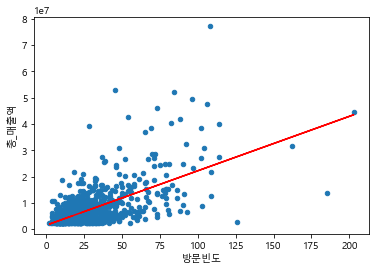

In [22]:
# + 시각화하기
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

      # 시각화를 위해 함수식 형태로 변환
fit = np.poly1d(np.polyfit(data['방문빈도'], data['총_매출액'], deg=1))
data[['방문빈도','총_매출액']].plot.scatter(x='방문빈도', y='총_매출액')
plt.plot(data['방문빈도'], fit(data['방문빈도']), 'r')  # Y = 1.572e+06 + 2.066e+05 X
plt.show()

### $\blacktriangleright$ 다중선형회귀분석
2개 이상의 수치형 독립변수가 1개의 수치형 종속변수에 미치는 영향을 검정한다.
$$Y = \beta_0 + \beta_1X_1 + \cdots + \beta_iX_i + \epsilon_i$$
- 추가된 독립변수의 영향력과 무관하게 변수가 추가됨에 따라 결정계수는 커진다. 이를 보안하여 수정된 결정계수를 평가지표로 사용한다.
- 여러 개의 독립변수를 고려하여 독립변수들 중 변수간 높은 상관관계를 갖거나 선형관계가 존재할 경우 다중공선성의 문제가 발생한다.<br> 다중공선성으로 추정된 회귀계수들의 분산이 커지기 때문에 추정된 회귀계수를 신뢰할 수 없다는 문제점이 발생한다. 때로 회귀계수 부호가 달라지는 등 비정상적인 회귀계수 값이 도출되기도 한다.
- 다중공선성이 높은 경우 상관관계가 높은 변수들 중 일부를 제거하여 재적합시키거나 주성분회귀 또는 능형회귀 등의 새로운 통계모형을 적용해야 한다.
- 다중공선성을 판별하는 지표로 분산팽창계수(VIF)가 있다. 변수 $X_j$가 다른 변수들과 강한 선형관계를 가지면 VIF 값은 매우 커진다. 통상적으로 VIF값이 10보다 크면 다중공선성이 있다고 판단한다.
  $$VIF_j = \frac{1}{1-R_j^2}$$
  $$(R_j^2: X_j\text{를 종속변수로, 나머지 독립변수들을 독립변수로 한 다중회귀모형의} R^2)$$
- 다중공선성의 문제와 모형관리를 위해 최소한의 중요한 변수들만 선택해 모형을 개발하는 것이 중요하다. 좋은 회귀모형은 적은 수의 독립변수로 종속변수의 분산을 많이 설명하는 모형이다.<br>
  • 전진선택법: 가장 중요한 변수순서로 하나씩 선택해 나가는 방법이다. 한 개의 독립변수로 회귀분석을 진행하여 F값이 가장 큰 모형을 찾아 그 변수를 가장 먼저 선택하게 된다.<br>
  • 후진제거법: 불필요한 변수를 하나씩 제거해 나가는 방법이다. 전진선택과 달리 모든 변수를 독립변수로 하여 시작한다. 그 중 유의하지 않은 변수들도 포함하면, 전체 변수에서 하나씩 제거하면서 분석을 진행한다.<br>
  • 단계선택법: 전진선택법과 후진제거법을 결합한 방식으로 전진선택법으로 하나씩 변수들을 선택해 나가면서 동시에 다중공선성이 높게 나타나는 변수를 후진제거방식으로 제거하는 방법이다.

In [5]:
# 1)다중선형회귀분석
from statsmodels.formula.api import ols
model = ols('총_매출액 ~ 서비스_만족도 + 방문빈도 + 구매_카테고리_수', data=data).fit()

In [6]:
# 2)모형 유의성 검정
#  :F-value는 230.8, p-value(Prob(F-statistic))은 1.19e-113으로 모형은 유의하다. 모형의 설명력은 40.8% 정도이다.
# 3)회귀계수 유의성 검정
#  :t-value는 -3.585, 22.973, 3.142이고 p-value는 모두 0.000으로 유의하다.
#   절편 또한 유의수준 0.05하에서 유의하다.
# 4)잔차 검정
#   :Prob(Omnibus)가 0.000임에 귀무가설을 기각해 잔차는 정규성을 만족하지 못한다.
#    Durbin-Watson이 2와 가까운 값을 가짐에 잔차의 독립성은 만족한다.
# + Cond.No.는 Condition Number로 다중공선성을 평가할 수 있는 통계량이다. 30보다 작은 값을 가지면 다중공선성이 없다고 판단한다.
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  총_매출액   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     230.8
Date:                Mon, 20 Feb 2023   Prob (F-statistic):          1.19e-113
Time:                        23:51:05   Log-Likelihood:                -16911.
No. Observations:                1000   AIC:                         3.383e+04
Df Residuals:                     996   BIC:                         3.385e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.033e+06   1.01e+06      2.009      0.045    4.76e+04    4.02e+06
서비스_만족도    -5.432e+05   1.52e+05     -3.585      0.000   -8.41e+05   -2.46e+05
방문빈도        2.053e+05   8938.286     22.973      0.000    1.88e+05    2.23e+05
구매_카테고리_수   5.022e+05    1.6e+05      3.142      0.002    1.89e+05    8.16e+05
==============================================================================
Omnibus:                      673.428   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16237.956
Skew:                           2.711   Prob(JB):                         0.00
Kurtosis:                      21.982   Cond. No.                         209.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# 5)다중공선성 확인
#  :VIF값이 모두 10 미만으로 다중공선성 문제는 없다고 볼 수 있다.
# + patsy는 회귀분석 전처리를 지원하는 패키지 중 하나이다.
from patsy import dmatrices 
y, X = dmatrices('총_매출액 ~ 서비스_만족도 + 방문빈도 + 구매_카테고리_수', data=data, return_type='dataframe')

from statsmodels.stats.outliers_influence import variance_inflation_factor
print(variance_inflation_factor(X.values, 1))
print(variance_inflation_factor(X.values, 2))
print(variance_inflation_factor(X.values, 3))

### $\blacktriangleright$ 더미변수를 이용한 회귀분석
범주형 변수를 독립변수로서 활용하기 위해 더미변수화해 모형에 포함시키는 방법이다.
$$\hat{Y} = \beta_0 + \beta_1V1_i + \beta_2V2_i + \cdots + \beta_nV{n-1}_i$$
$$(n: \text{범주수})$$
- 더미변수화란 one-hot encoding을 의미하며 범주수 - 1개의 변수로 변환하는 방법이다. 이때 모든 변수가 0을 갖는 범주를 기준범주라 한다.
- 각 변수의 회귀계수는 변수가 나타낸 범주가 기준범주에 비해 회귀계수만큼 많다는 의미이다.

In [18]:
# 1)더미변수 생성
#  :drop_first=True로 설정해 범주수 - 1개의 더미변수를 생성한다. 이때 최초의 범주가 무조건 기준범주가 된다.
dummy = pd.concat([data['방문빈도'], pd.get_dummies(data['구매유형'], prefix='구매유형', drop_first=True)], axis=1)

In [20]:
# 2)더미변수 회귀분석
from statsmodels.formula.api import ols
model = ols('방문빈도 ~ 구매유형_2 + 구매유형_3 + 구매유형_4', data=dummy).fit()

In [21]:
# 3)모형 유의성 검정
#  :Prob(F-statistic)가 8.42e-122로 산출됨에 모형은 유의하며 모형의 설명력은 43% 정도다.
# 4)회귀계수 유의성 검정
#  :P값이 0.000, 0.000, 0.009, 0.003으로 모든 회귀계수가 유의하다.
#   회귀계수에 따라 1회성 구매고객(기준범주)의 방문횟수는 10.023(절편)회이고
#   실용적 구매고객은 기준범주에 비해 36.974회 많게 방문해 46.997회 방문한다 볼 수 있다.
#   명품구매고객의 방문횟수는 17.375회, 집중구매고객의 방문횟수는 17.683회이다.
# 5)잔차 검정
#  :Prob(Omnibus)에 따라 잔차는 정규성을 만족하지 못하고 Durbin-Watson 통계량으로 잔차간 독립성은 만족한다.
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   방문빈도   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 21 Feb 2023   Prob (F-statistic):          8.42e-122
Time:                        00:14:14   Log-Likelihood:                -4193.5
No. Observations:                1000   AIC:                             8395.
Df Residuals:                     996   BIC:                             8415.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.0233      2.450      4.092      0.000       5.216      14.830
구매유형_2        36.9736      2.611     14.163      0.000      31.851      42.096
구매유형_3         7.3517      2.792      2.634      0.009       1.874      12.830
구매유형_4         7.6602      2.554      3.000      0.003       2.649      12.671
==============================================================================
Omnibus:                      754.728   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18540.829
Skew:                           3.215   Prob(JB):                         0.00
Kurtosis:                      23.091   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### $\blacktriangleright$ 비선형회귀분석

### 잔차분석
- 표준화잔차와 $\hat{Y}$간 산점도에서 곡선이 보이면 제곱항 등 고차원항을 집어넣어야 한다. 이때 제곱항을 넣어 만들어진 회귀모형이 어떤 의미를 가질 지 따져보아야 한다. 단순히 수치간 관계가 있어 높은 설명력을 갖는 모형이 된 것일 수 있다.